# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create two new dataframes

north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [2]:
# Put your EDA code here

#print(north_df)
print(north_df.columns)
print()
print("north reps")
print(north_df['Rep ID'].nunique())
print()
print("south reps")
print(south_df['Rep ID'].nunique())
print()
print("north stats")
print(
    north_df.agg(
        {
        'Busy Minutes' : ['mean'],
        'Not Ready Minutes' : ['mean'],
        'Incoming Wait Time' : ['mean'],
        'During Call Wait Time' : ['mean']
        }
    )
)
print()
print("south stats")
print(
    south_df.agg(
        {
        'Busy Minutes' : ['mean'],
        'Not Ready Minutes' : ['mean'],
        'Incoming Wait Time' : ['mean'],
        'During Call Wait Time' : ['mean']
        }
    )
)
print()
print("north calls per time block")
print(north_df['Time Block'].value_counts())
print()
print("south calls per time block")
print(south_df['Time Block'].value_counts())

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

north reps
9

south reps
11

north stats
      Busy Minutes  Not Ready Minutes  Incoming Wait Time  \
mean      9.987755           1.914286             3.04878   

      During Call Wait Time  
mean               2.967347  

south stats
      Busy Minutes  Not Ready Minutes  Incoming Wait Time  \
mean      10.05414           1.910828                 3.0   

      During Call Wait Time  
mean               3.076433  

north calls per time block
12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

south calls per time block
12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM

### EDA Results

Make note of your results here!

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [3]:
#the north branch has 9 reps
#the south branch has 11 reps

#the averages were very similar between the branches, with the south branch taking slightly more time for most categories
#busy 10 mins, not ready 2 mins, incoming wait 3 mins, call wait 3 mins

#this is interesting since it sorts by # of calls.
#surprised the least amount is at 9am and most calls at lunchtime

#south has a lot more volume than north by hour and especially at midday

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [4]:
# Clean your data here

for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing)* 100))

print()
    
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing)* 100))
    
print()
print(north_df.duplicated().sum())
print()
print(south_df.duplicated().sum())
print()


Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 100%
During Call Wait Time - 0%
Calls - 0%

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 100%
During Call Wait Time - 0%
Calls - 0%

0

0



### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [5]:
#i tested several combinations of duplicated, sum, value counts, etc in order to figure out what you mean by "In the North data set, there are two separate "YES" values for a sale"
#based on everything ive done, there are no duplicates?
#maybe at some point i removed duplicates, but i don't think thats what the above code is doing. unsure

#theoretically, if there were duplicates, i would remove them

# the analysis is to determine if more reps are needed
# to enhance customer experience

# columns that may be unecessary: Call Purpose, Queue, Incoming or Outgoing, Sale(?) 
# lost call might skew the data, since sometimes it is due to max capacity and sometimes technical error

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [6]:
df = pd.concat([north_df, south_df])

df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [7]:
# Manipulate data here

#number of calls

sumcalls = df.groupby("Rep ID").sum()
mostcalls = sumcalls.sort_values(by = 'Calls', ascending =  False)
print(mostcalls)
print()

#call abandonment by branch then for all

branchaban = df.groupby("Branch")
print(branchaban["Abandoned"].mean())
print()

aban = df["Abandoned"].mean()
print(aban)
print()

sla = df.groupby("Branch")
print(sla["Incoming Wait Time"].value_counts())
print()

# i understand the above code is not giving me exactly what you are asking for here
# i feel like its the closest way i can still get the result
# but i'm not sure how to get a percentage of a set of values. i feel like i need to use an IF statement or something similar to count how many fit in the SLA 
# but i cannot find anything similar to this in past homework, readings, studios, etc

# average answer speed
answerspeed = sla.mean()
print(answerspeed["Incoming Wait Time"])

        Unnamed: 0  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Rep ID                                                                      
Brent         4840          0          1           362                 71   
Eric          5039          0          0           361                 54   
Randy         4576          3          1           320                 66   
Sandy         4694          1          0           325                 60   
Helga         5236          0          2           292                 58   
Lilly         3375          0          2           307                 59   
Todd          4252          1          0           296                 58   
Duke          2999          2          0           292                 56   
George        4620          0          0           298                 53   
Kate          4615          0          0           291                 61   
Karl          4532          1          0           287                 61   

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [8]:
# abandonment rate is ok within range for both branches but north branch is notably worse than south


## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

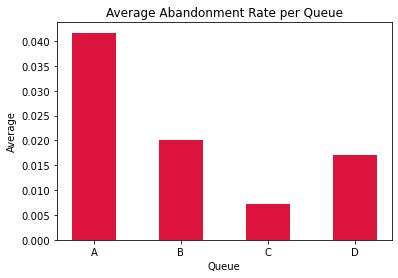

In [9]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
values = list(abandonment_rates.values())

plt.bar(queues, values, color = 'crimson', width = 0.5)
plt.title('Average Abandonment Rate per Queue', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Queue', color = 'black')
plt.ylabel('Average', color = 'black')

plt.show()

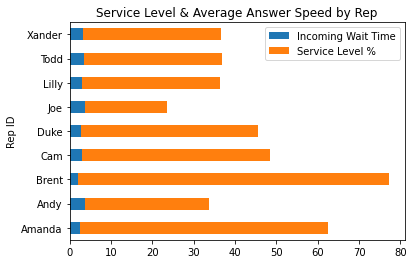

In [10]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100


group_df = north_plt.merge(service_level, on = "Rep ID").drop(columns = ["Calls_x", "Calls_y"])
#print(group_df.head())

#(north_plt("Rep ID")
#north_plt("Incoming Wait Time")
#service_level("Service Level %")

group_df.plot(
    x = "Rep ID",
    kind = "barh",
    stacked = "True",
    title = "Service Level & Average Answer Speed by Rep")
    
plt.show()

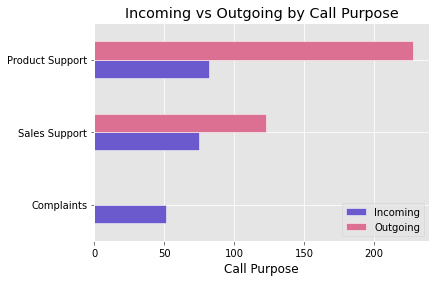

In [15]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#labels = ['Complaints', 'Sales Support', 'Product Support']
df_group = pd.DataFrame([complaints, sales_support, product_support], columns = ["Incoming", "Outgoing"], index = labels)

colors = ['slateblue','palevioletred']

df_group.plot.barh(edgecolor = 'white', color = colors)
plt.title("Incoming vs Outgoing by Call Purpose")
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel("Call Purpose", color = "black")
plt.legend()
plt.style.use('ggplot')

plt.show()

#print(df_group.head())

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

In [12]:
# Visualization One

# I chose a bar graph because I wanted to keep it simple and easy to read.

# Visualization Two

# I tried a few different types of charts in the beginning. I was unsure how to show a small number and large number for each rep 
# At first I tried a grouped graph but then I realized a stacked graph made it easier to compare each rep while only looking at one bar per person
# Then I changed it to horizontal, for some reason this made it easier for me to read/compare the smaller Wait Time across reps

# Visualization Three

# Again I tried a few different ideas but quickly realized a grouped bar was the best way to show the information
# This time it is horizontal to make the labels easier to read
# I also changed the color because I felt bad doing 3 bar graphs ! But it was the most simple way to convey the information

# I think multiple pie charts for each call purpose could have been an effective visual as well for #3, but much less concise 

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

In [13]:
# Overall the South Branch could probably use extra help. They have more calls per hour which leads to longer wait times and lower service level percent.
# The abandonment rate is worse for the North Branch, I believe this could be situational or an outlier

# I think it would also be advisable for the company to identify individual reps that could use more training based off this data, which could improve things without hiring more people
# I wish I had more time to sort the data based on Rep and Queue to dive deep into where the issues are. This feels like only scratching the surface of what the data could provide

# For example it might help to have more people staffed midday instead of bringing on more people
# That's probably best for the company to decide based on the data though

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [14]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
